## 1.  Create a model to optimize prediction of handwritten digits (MNIST dataset). Evaluate the results and tune the parameters to achieve better predictions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from numpy import linalg as la

### 1a. Load the MNIST dataset and split the data into a training set and testing set.


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 1b. Display the first three images of the test data.


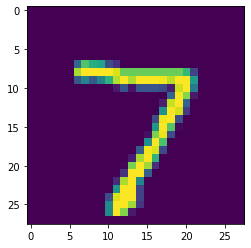

In [4]:
plt.imshow(x_test[0, :, :])

In [5]:
y_test[0]

7

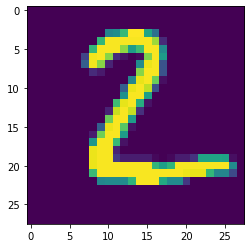

In [6]:
plt.imshow(x_test[1, :, :])

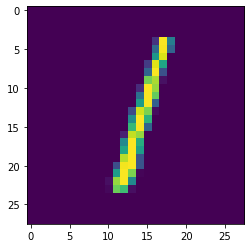

In [7]:
plt.imshow(x_test[2, :, :])

### 1c. Display the first three images of the training data.


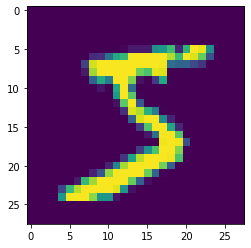

In [8]:
plt.imshow(x_train[0, :, :])

In [9]:
y_train[0]

5

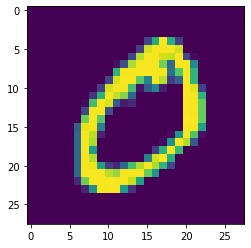

In [10]:
plt.imshow(x_train[1, :, :])

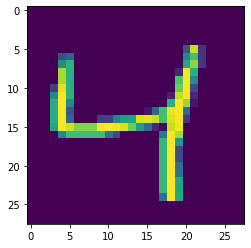

In [11]:
plt.imshow(x_train[2, :, :])

### 1d. Create a model with two dense layers using the tanh and softmax activation functions. Compile the model using the Stochastic Gradient Descent optimizer using the Mean Squared Error loss function.


In [12]:
# tf.keras.layer.Flatten() - This flattens the 28x28 input
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(784,activation=tf.nn.tanh),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [13]:
model.compile(optimizer="SGD", loss = 'mean_squared_error',metrics=['accuracy'])

### 1e. Calculate the confusion matrix of this data after 1 epoch.


In [14]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 6s 3ms/step - loss: 27.3179 - accuracy: 0.1061


In [15]:
test_predictions = model.predict(x_test)

In [16]:
confusion = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print("The confusion matrix is: ")
confusion # It's better if we have values along diagonal & other values zeroes

The confusion matrix is: 


array([[139,  92, 133,  94,  73,  99,  82, 117, 108,  43],
       [123, 116, 117, 120, 100, 104,  50, 114, 170, 121],
       [108, 157,  58,  64,  93,  93, 108,  88, 131, 132],
       [119,  83,  87, 145, 119,  94,  86,  66,  91, 120],
       [109, 144,  56,  79,  89, 113,  82,  76, 112, 122],
       [112, 101,  84, 121,  77,  74, 110,  55,  86,  72],
       [ 90,  95,  74, 116,  87, 107,  81, 110, 104,  94],
       [ 80, 100,  93,  91, 102,  99, 124, 104, 103, 132],
       [ 98,  52, 104, 137, 103,  82, 112,  75, 110, 101],
       [121,  95,  80, 139,  89, 132,  87,  97, 103,  66]], dtype=int64)

### 1f. Do this again, but with 3 epochs and splitting the data into 10 segments.


In [17]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(784,activation=tf.nn.tanh),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [18]:
model.compile(optimizer="SGD", loss = 'mean_squared_error',metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 27.3173 - accuracy: 0.1142
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 27.3147 - accuracy: 0.0991
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 27.3137 - accuracy: 0.1001


In [20]:
test_predictions = model.predict(x_test)

In [21]:
confusion = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print("The confusion matrix is: ")
confusion # It's better if we have values along diagonal & other values zeroes

The confusion matrix is: 


array([[ 99,  83,  97, 106, 101, 101,  82,  94, 117, 100],
       [ 95, 101, 107, 147, 124, 104,  83, 150, 116, 108],
       [126,  96,  94, 113, 102, 102, 120,  91, 100,  88],
       [105, 120,  99,  97, 115,  97,  91,  94, 105,  87],
       [ 81,  83,  95, 105, 112, 105,  91,  94,  93, 123],
       [ 97,  69,  92, 104, 105,  91,  73,  86,  87,  88],
       [107, 102,  74, 100,  91, 103,  86, 110, 101,  84],
       [125,  84,  99,  95, 109, 115,  72, 107, 110, 112],
       [ 95,  69,  76, 112, 119,  97,  76,  90, 125, 115],
       [105,  80, 113,  66, 148, 112, 100,  99,  89,  97]], dtype=int64)

### 1g. Repeat the process, but this time use the Sparse Categorical Crossentropy as the loss function

In [22]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(784,activation=tf.nn.tanh),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [23]:
model.compile(optimizer="SGD", loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5309 - accuracy: 0.8352
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3869 - accuracy: 0.8827
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3550 - accuracy: 0.8920


In [25]:
test_predictions = model.predict(x_test)

In [26]:
confusion = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print("The confusion matrix is: ")
confusion # It's better if we have values along diagonal & other values zeroes

The confusion matrix is: 


array([[ 960,    0,    1,    2,    0,    4,    7,    1,    4,    1],
       [   0, 1112,    5,    5,    0,    3,    3,    1,    6,    0],
       [   7,    1,  950,   11,    4,    0,   14,   11,   29,    5],
       [   2,    1,   25,  899,    0,   22,    4,   16,   25,   16],
       [   0,    2,    7,    0,  875,    3,   10,    2,    4,   79],
       [   9,    1,    5,   33,    1,  811,    8,    6,    9,    9],
       [   9,    3,    8,    2,   12,   16,  901,    2,    5,    0],
       [   0,    7,   21,    1,   10,    1,    0,  942,    5,   41],
       [   2,    6,    9,   26,   10,   20,   11,   12,  836,   42],
       [   6,    7,    1,    7,   28,    8,    1,   14,    6,  931]],
      dtype=int64)

## 2. The following random set of numbers X are xi for i=1,2,...10 where xk = (x1, x2) and the mean of X is µ = (µ1, µ2):
#### x1 = (-4, -4) x2 = (1, 0) x3 = (2, 3) x4 = (-1, 2) x5 = (-2, -2) x6 = (-4, -1) x7 = (-2, -1) x8 = (-5, -5) x9 = (-2, -3) x10 = (4, 4)

In [27]:
x = np.array([[-4,4],
              [1,0],
              [2,3],
              [-1,2],
              [-2,2],
              [-4,-1],
              [-2,-1],
              [-5,-5],
              [-2,-3],
              [4,4]])

### 1a. Calculate for k=1, 2, 3: di = ||xk − xi||^2 ∀xi = (1, 2, ..., 10)

In [28]:
# We decide the centers based on the number of clusters (given k = 3)

c1 = x[0,:]
c2 = x[1,:]
c3 = x[2,:] 

In [29]:
dist1 = c1 - x
dist2 = c2 - x
dist3 = c3 - x

In [30]:
k1 = la.norm(dist1, axis=1)
k2 = la.norm(dist2, axis = 1)
k3 = la.norm(dist3, axis=1)

In [31]:
k1

array([0.        , 6.40312424, 6.08276253, 3.60555128, 2.82842712,
       5.        , 5.38516481, 9.05538514, 7.28010989, 8.        ])

In [32]:
k2

array([6.40312424, 0.        , 3.16227766, 2.82842712, 3.60555128,
       5.09901951, 3.16227766, 7.81024968, 4.24264069, 5.        ])

In [33]:
k3

array([ 6.08276253,  3.16227766,  0.        ,  3.16227766,  4.12310563,
        7.21110255,  5.65685425, 10.63014581,  7.21110255,  2.23606798])

### 2b. Based on the distance of each xi from each xk, assign them into the cluster with xk as the center.


In [34]:
clusters = np.argmin([k1,k2,k3], axis=0)

In [35]:
C1 = x[clusters==0]
C2 = x[clusters==1]
C3 = x[clusters==2]

In [36]:
centroids = np.array([c1, c2, c3])
centroids

array([[-4,  4],
       [ 1,  0],
       [ 2,  3]])

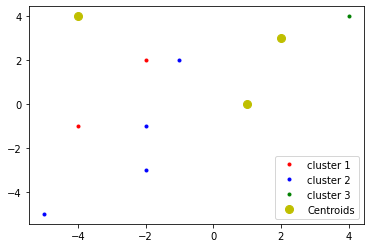

In [37]:
plt.plot(C1[:,0],C1[:,1],'r.', label='cluster 1')
plt.plot(C2[:,0],C2[:,1],'b.', label='cluster 2')
plt.plot(C3[:,0],C3[:,1],'g.', label='cluster 3')
plt.plot(centroids[:,0], centroids[:,1], 'yo', markersize=8, label='Centroids')
plt.legend(loc='best')
plt.show()

### 2c. . Calculate the standard deviation or squared error of each point in the clusters relative to their mean, where n is the total number of points in each cluster.


In [207]:
np.std(C1)

2.9674156357941426

In [208]:
np.std(C2)

2.2

In [209]:
np.std(C3)

0.82915619758885

### 2d.

In [28]:
# We decide the centers based on the number of clusters (given k = 3)

c1 = x[3,:]
c2 = x[4,:]
c3 = x[5,:] 

In [29]:
dist1 = c1 - x
dist2 = c2 - x
dist3 = c3 - x

In [30]:
k1 = la.norm(dist1, axis=1)
k2 = la.norm(dist2, axis = 1)
k3 = la.norm(dist3, axis=1)

In [31]:
k1

array([0.        , 6.40312424, 6.08276253, 3.60555128, 2.82842712,
       5.        , 5.38516481, 9.05538514, 7.28010989, 8.        ])

In [32]:
k2

array([6.40312424, 0.        , 3.16227766, 2.82842712, 3.60555128,
       5.09901951, 3.16227766, 7.81024968, 4.24264069, 5.        ])

In [33]:
k3

array([ 6.08276253,  3.16227766,  0.        ,  3.16227766,  4.12310563,
        7.21110255,  5.65685425, 10.63014581,  7.21110255,  2.23606798])

In [34]:
clusters = np.argmin([k1,k2,k3], axis=0)

In [35]:
C1 = x[clusters==0]
C2 = x[clusters==1]
C3 = x[clusters==2]

In [36]:
centroids = np.array([c1, c2, c3])
centroids

array([[-4,  4],
       [ 1,  0],
       [ 2,  3]])

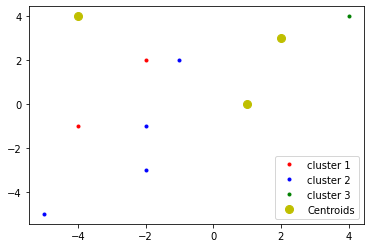

In [37]:
plt.plot(C1[:,0],C1[:,1],'r.', label='cluster 1')
plt.plot(C2[:,0],C2[:,1],'b.', label='cluster 2')
plt.plot(C3[:,0],C3[:,1],'g.', label='cluster 3')
plt.plot(centroids[:,0], centroids[:,1], 'yo', markersize=8, label='Centroids')
plt.legend(loc='best')
plt.show()

### 2e.

It depends on the initial centers we choose, better the initial centers better the clusters which would make no difference in further increasing the iteration as the centers would already have been reached the optimum value.

## 3. Generate three clusters with 200 points each with a standard normal distribution but with the following variance (σ) and means (µ): σ1 = (1.2,0.8) µ1 = (-2,-2) σ2 = (0.9, 0.7) µ2 = (0,0) σ3 = (0.8, 0.5) µ3 = (3,4)

### 3a. Plot the three clusters with different colors for each to show the desired response.


In [44]:
x11 = np.random.standard_normal((200,1))*1.2+np.ones((200,1))-2
x12 = np.random.standard_normal((200,1))*0.8+np.ones((200,1))-2
x1= np.concatenate((x11,x12),axis=1)

In [45]:
x21 = np.random.standard_normal((200,1))*0.9+np.ones((200,1))
x22 = np.random.standard_normal((200,1))*0.7+np.ones((200,1))
x2 = np.concatenate((x21,x22),axis=1)

In [46]:
x31 = np.random.standard_normal((200,1))*0.8+np.ones((200,1))+3
x32 = np.random.standard_normal((200,1))*0.5+np.ones((200,1))+4
x3 = np.concatenate((x31,x32),axis=1)

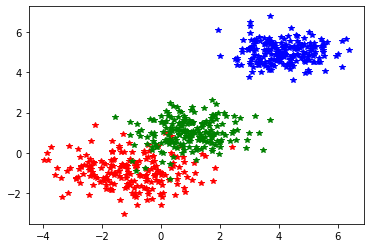

In [47]:
X = np.concatenate((x1,x2,x3),axis=0)
plt.plot(X[0:200,0],X[0:200,1],'r*')
plt.plot(X[200:400,0], X[200:400,1],'g*')
plt.plot(X[400:600,0],X[400:600,1],'b*')

### 3b. Calculate the K-by-K cross-correlation function for the three clusters. The initial cluster centers can be any three points in the dataset selected at random.

In [48]:
import scipy
from scipy.spatial.distance import cdist
x = X
k = 3
idx = np.sort(np.random.choice(len(x),k,replace=False))
centroids = x[idx,:]

In [49]:
k_by_1_corr_fn = cdist(x, centroids, 'seuclidean')

In [50]:
k_by_1_corr_fn.shape

(600, 3)

In [51]:
points = np.array([np.argmin(i) for i in k_by_1_corr_fn])

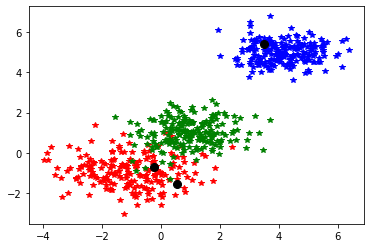

In [52]:
plt.plot(X[0:200,0],X[0:200,1],'r*')
plt.plot(X[200:400,0], X[200:400,1],'g*')
plt.plot(X[400:600,0],X[400:600,1],'b*')
plt.plot(centroids[:,0], centroids[:,1], 'ko', markersize=8, label='centroids')

### 3c. Plot the cluster assignments along with the centroids of the three clusters for this initial iteration

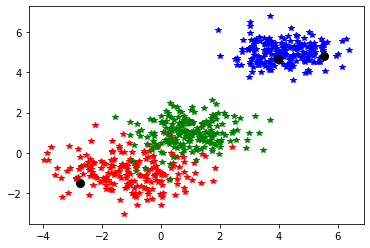

In [53]:
idx = np.sort(np.random.choice(len(x),k,replace=False))
centroids = x[idx,:]
points = np.array([np.argmin(i) for i in k_by_1_corr_fn])
old_cent = centroids
plt.plot(X[0:200,0],X[0:200,1],'r*')
plt.plot(X[200:400,0], X[200:400,1],'g*')
plt.plot(X[400:600,0],X[400:600,1],'b*')
plt.plot(centroids[:,0], centroids[:,1], 'ko', markersize=8, label='centroids')

### 3d. Repeat for one more iteration and calculate the prior estimation error.


Prior estimation error:  -9.45284321711998
Iteration Number:  1


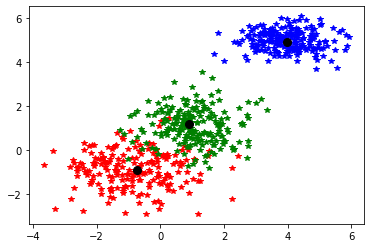

Prior estimation error:  0.10333713053391269
Iteration Number:  2


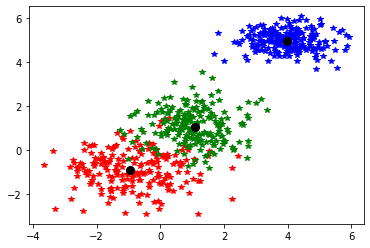

In [54]:
no_of_iterations = 2
for i in range(no_of_iterations):
    
    centroids = []
    for idx in range(k):
        temp_cent = x[points==idx].mean(axis=0)
        centroids.append(temp_cent)
        
    centroids = np.vstack(centroids)
    prior_estimation_error = np.sum(old_cent - centroids)
    print("Prior estimation error: ",prior_estimation_error)
    if np.abs(prior_estimation_error) < 0.01:
        print("Required prior estimation error reached.")
        break
        
    print("Iteration Number: ", i+1)
    
    old_cent = centroids
    k_by_1_corr_fn = cdist(x, centroids, 'seuclidean')
    points = np.array([np.argmin(i) for i in k_by_1_corr_fn])
    plt.plot(X[0:200,0],X[0:200,1],'r*')
    plt.plot(X[200:400,0], X[200:400,1],'g*')
    plt.plot(X[400:600,0],X[400:600,1],'b*')
    plt.plot(centroids[:,0], centroids[:,1], 'ko', markersize=8, label='centroids')
    plt.show()

## 4.Generate a sample of data for N = 50 points and variance σ = 50.


### 4a. Plot the points.


In [195]:
def generateSamples(N, variance=50):
    import random
    X = np.matrix(range(N)).T + 1
    Y = np.matrix([random.random() * variance + i for i in range(len(X))]).T
    return X, Y

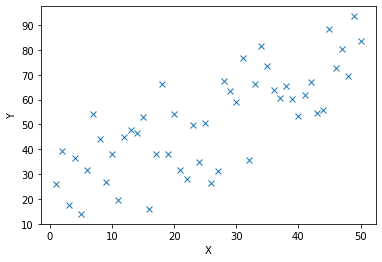

In [83]:
N = 50
variance = 50
X, Y = generateSamples(N, variance)
plt.plot(X, Y, "x")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### 4b. Calculate the gradient descent for a line through the sample data points with a learning rate η = 0.00001 for 10,000 iterations.

In [197]:
def fitModel_gradient(x,y,maxIteration, nu):
    N = len(x)
    w = np.zeros((x.shape[1],1))
    eta = 0.00001      #learning rate
    epsilon = False   #Prior estimation error determination
    error = x * w - y
    old_gradient = x.T * error/N
    w = w - eta * old_gradient
    for i in range(maxIteration):
        error = x * w - y
        gradient = x.T * error/N
        w = w - eta *gradient
        prior_estimation_error = np.abs((old_gradient - gradient)[0])
        old_gradient = gradient
        if prior_estimation_error < nu:
            print("Required prior estimation error reached.")
            print("Number of iteration: ", i)
            epsilon = True
            break
    print('Prior estimation error: ', prior_estimation_error)
    return w, epsilon

In [198]:
maxIteration = 10000
nu = 0.01
w, epsilon = fitModel_gradient(X, Y, maxIteration, nu) # learning rate (eta) is 0.00001

Required prior estimation error reached.
Number of iteration:  415
Prior estimation error:  [[0.009932]]


### 4c. Plot the points and the best fit line that was calculated using Gradient Descent.


In [200]:
def plotModel(x, y, w):
    plt.plot(x[:,1], y, "x")
    plt.plot(x[:,1],x*w, "r-")
    plt.show()

Prior estimation error:  [[0.3888504]]


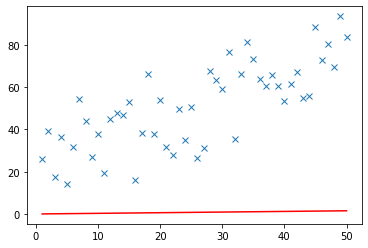

Prior estimation error:  [[0.32721177]]


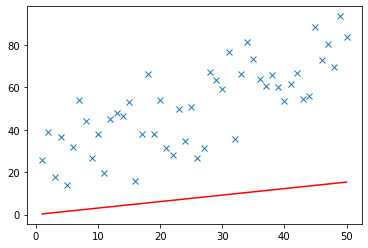

Prior estimation error:  [[0.27534415]]


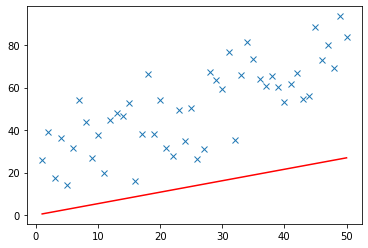

Prior estimation error:  [[0.23169863]]


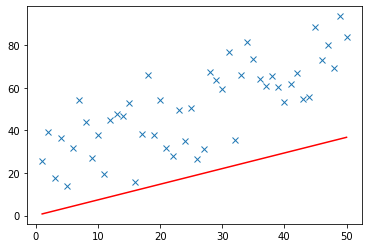

Prior estimation error:  [[0.19497184]]


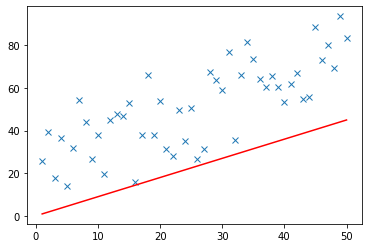

In [87]:
X = np.hstack([np.matrix(np.ones(len(X))).T, X])
nu = 0.01
for i in range(1,100,20):
    w, epsilon = fitModel_gradient(X,Y,i,nu)
    plotModel(X,Y,w)
    if epsilon:
        break

### 4d. Repeat the process for N = 100, 200, and 500 and for σ = 100, 50, 300.


Prior estimation error:  [[30.05047162]]


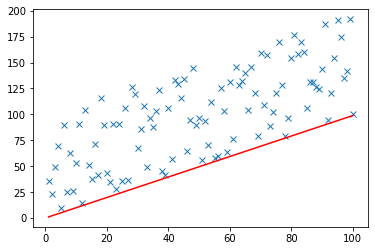

Required prior estimation error reached.
Number of iteration:  20
Prior estimation error:  [[0.00802118]]


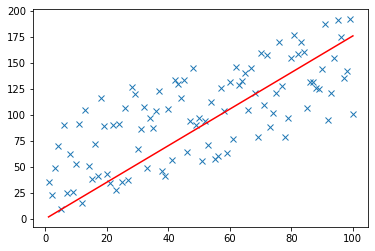

In [63]:
N = 100
variance = 100
X,Y = generateSamples(N,variance)
X = np.hstack([np.matrix(np.ones(len(X))).T, X])
nu = 0.01
for i in range(1,100,20):
    w, epsilon = fitModel_gradient(X,Y,i,nu)
    plotModel(X,Y,w)
    if epsilon:
        break

Prior estimation error:  [[160.4565897]]


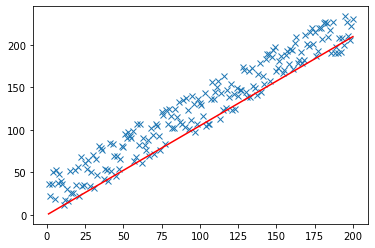

Required prior estimation error reached.
Number of iteration:  10
Prior estimation error:  [[0.00381543]]


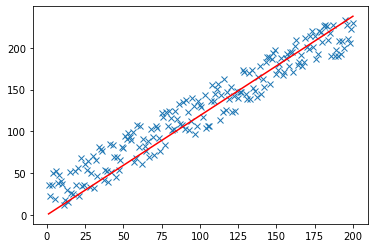

In [64]:
N = 200
variance = 50
X,Y = generateSamples(N,variance)
X = np.hstack([np.matrix(np.ones(len(X))).T, X])
nu = 0.01
for i in range(1,100,20):
    w, epsilon = fitModel_gradient(X,Y,i,nu)
    plotModel(X,Y,w)
    if epsilon:
        break

Prior estimation error:  [[3062.85100297]]


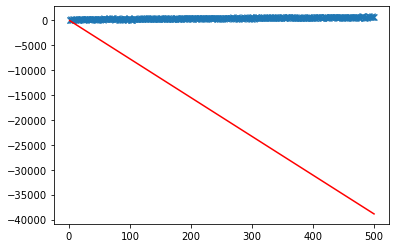

Prior estimation error:  [[6.63472876e+20]]


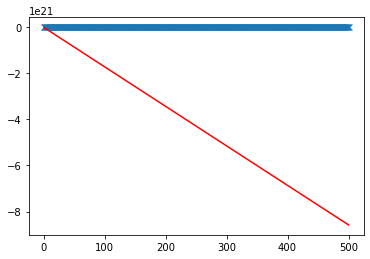

Prior estimation error:  [[1.43721128e+38]]


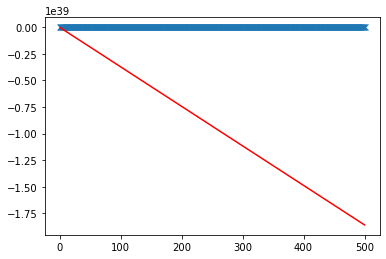

Prior estimation error:  [[3.11327912e+55]]


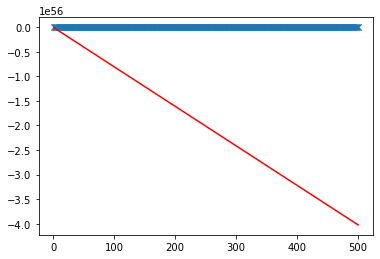

Prior estimation error:  [[6.74396803e+72]]


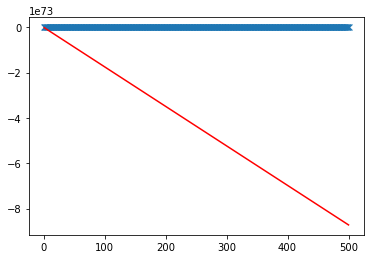

In [65]:
N = 500
variance = 300
X,Y = generateSamples(N,variance)
X = np.hstack([np.matrix(np.ones(len(X))).T, X])
nu = 0.01
for i in range(1,100,20):
    w, epsilon = fitModel_gradient(X,Y,i,nu)
    plotModel(X,Y,w)
    if epsilon:
        break

### 4e. What happens when you increase the learning rate from η = 0.00001 to η = 0.0001, then again to η = 0.001?


#### η = 0.0001and The X, Y from N=500, variance=300 will be used here

In [89]:
def fitModel_gradient(x,y,maxIteration, nu): #The X, Y from N=500, variance=300 will be used here
    N = len(x)
    w = np.zeros((x.shape[1],1))
    eta = 0.0001      #learning rate=0.0001
    epsilon = False   #Prior estimation error determination
    error = x * w - y
    old_gradient = x.T * error/N
    w = w - eta * old_gradient
    for i in range(maxIteration):
        error = x * w - y
        gradient = x.T * error/N
        w = w - eta *gradient
        prior_estimation_error = np.abs((old_gradient - gradient)[0])
        old_gradient = gradient
        if prior_estimation_error < nu:
            print("Required prior estimation error reached.")
            print("Number of iteration: ", i)
            epsilon = True
            break
    print('Prior estimation error: ', prior_estimation_error)
    return w, epsilon

In [90]:
maxIteration = 10000
nu = 0.01
w, epsilon = fitModel_gradient(X, Y, maxIteration, nu) # learning rate (eta) is 0.0001

Required prior estimation error reached.
Number of iteration:  67
Prior estimation error:  [[0.00959595]]


#### η = 0.001and The X, Y from N=500, variance=300 will be used here

In [91]:
def fitModel_gradient(x,y,maxIteration, nu): #The X, Y from N=500, variance=300 will be used here
    N = len(x)
    w = np.zeros((x.shape[1],1))
    eta = 0.001      #learning rate=0.001
    epsilon = False   #Prior estimation error determination
    error = x * w - y
    old_gradient = x.T * error/N
    w = w - eta * old_gradient
    for i in range(maxIteration):
        error = x * w - y
        gradient = x.T * error/N
        w = w - eta *gradient
        prior_estimation_error = np.abs((old_gradient - gradient)[0])
        old_gradient = gradient
        if prior_estimation_error < nu:
            print("Required prior estimation error reached.")
            print("Number of iteration: ", i)
            epsilon = True
            break
    print('Prior estimation error: ', prior_estimation_error)
    return w, epsilon

In [92]:
maxIteration = 10000
nu = 0.01
w, epsilon = fitModel_gradient(X, Y, maxIteration, nu) # learning rate (eta) is 0.0001

Required prior estimation error reached.
Number of iteration:  5
Prior estimation error:  [[0.00358717]]


#### 4e Outcome: So we can conclude that when we increase the learning rate the Prior estimation error decreases and vice versa

### 4f. Plot the results at the 10th, 100th, and 1000th iterations.


In [203]:
N = 50
variance = 50
X,Y = generateSamples(N,variance)
X = np.hstack([np.matrix(np.ones(len(X))).T, X])
nu = 0.01
for i in range(0,1001,10):
    w, epsilon = fitModel_gradient(X,Y,i,nu)
    if i==10 or 100 or 1000:
        plotModel(X,Y,w)

UnboundLocalError: local variable 'prior_estimation_error' referenced before assignment

## 5. Generate a surface with the equation: 
    Z = 0.1X^3 + Y^2 
For values of X, Y = [−2, 2]

### 5a. Plot the surface

In [71]:
import scipy.optimize as sopt
from mpl_toolkits.mplot3d import Axes3D

def f(x):
    return 0.1*x[0]**3 + x[1]**2

def df(x):
    return np.array([0.3*x[0]**2, 2*x[1]])

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/2466780460.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


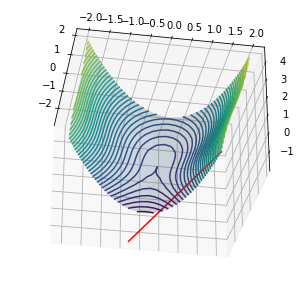

In [74]:
guesses = [np.array([-2,2])]

x = guesses[-1]
s = -df(x)

def f1d(alpha):
    return f(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_guess = x + alpha_opt * s
guesses.append(next_guess)

fig = plt.figure()
ax = Axes3D(fig)
ax.azim = -10
ax.dist = 10
ax.elev = -30
xmesh, ymesh = np.mgrid[-2:2:25j,-2:2:25j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh, alpha=0.2)
ax.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
ax.plot(it_array.T[0], it_array.T[1], f(it_array.T), "r-")
plt.show()

### 5b. Implement the Steepest Descent algorithm to fine the minimum on this surface with an initial starting point of X0 = 1.5 and Y0 = 1.8.


C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/2665461781.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


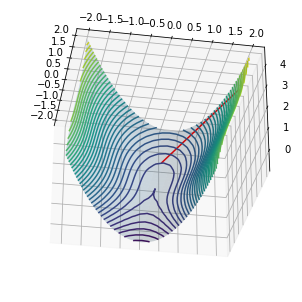

[1.5 1.8]


C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/2665461781.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


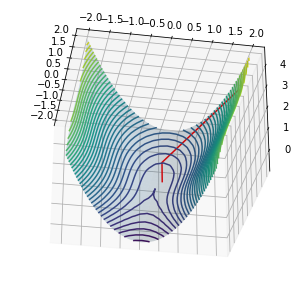

[ 1.1554595  -0.03754931]


C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/2665461781.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


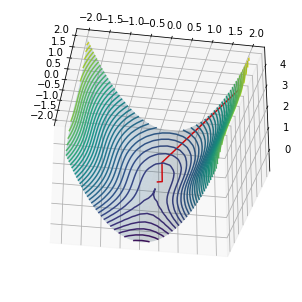

[0.37026203 0.1096752 ]
(X1, Y1):  [ 1.1554595  -0.03754931] 
(X2, Y2):  [0.37026203 0.1096752 ]


In [73]:
guesses = [np.array([1.5, 1.8])]

for i in range(3):

    x = guesses[-1]
    s = -df(x)
    
    def f1d(alpha):
        return f(x + alpha*s)
    
    alpha_opt = sopt.golden(f1d)
    next_guess = x + alpha_opt * s
    guesses.append(next_guess)
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.azim = -10
    ax.dist = 10
    ax.elev = -30
    xmesh, ymesh = np.mgrid[-2:2:25j,-2:2:25j]
    fmesh = f(np.array([xmesh, ymesh]))
    ax.plot_surface(xmesh, ymesh, fmesh, alpha=0.2)
    ax.contour(xmesh, ymesh, fmesh, 50)
    it_array = np.array(guesses)
    ax.plot(it_array.T[0], it_array.T[1], f(it_array.T), "r-")
    plt.show()
    print(x)
print("(X1, Y1): ", guesses[1], "\n(X2, Y2): ", guesses[2])

### 5d. How many iterations does it take for the values to converge such that ϵ < 0.0001 where ϵ is the change in the value between Xn, Yn and Xn−1, Yn−1.


C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


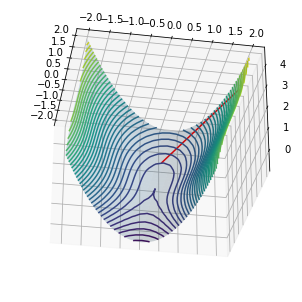

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


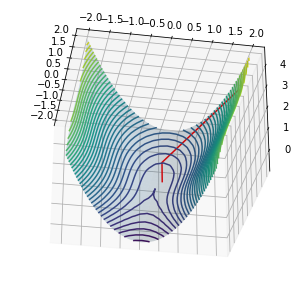

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


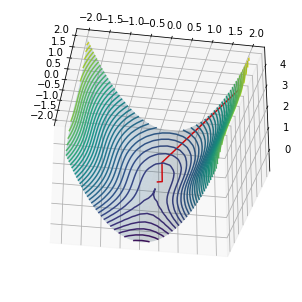

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


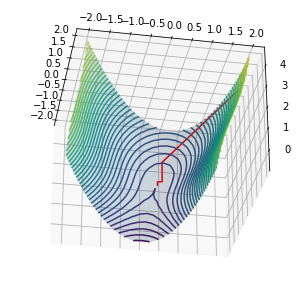

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


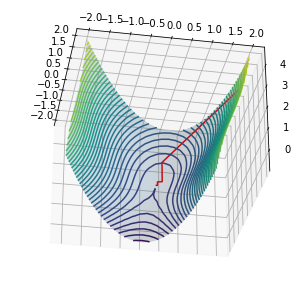

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


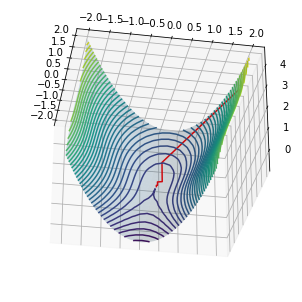

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


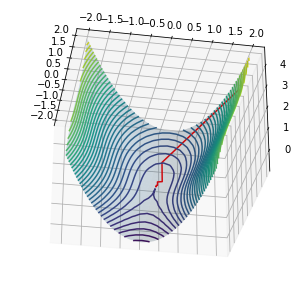

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


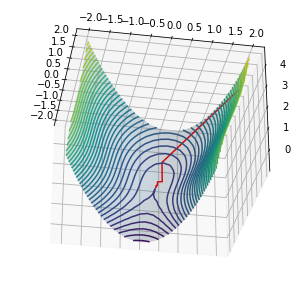

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


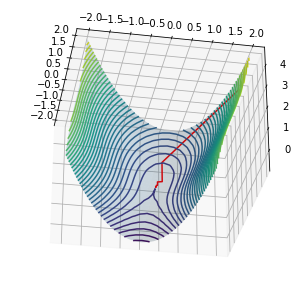

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


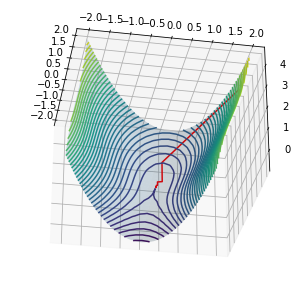

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


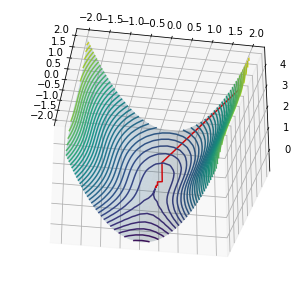

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


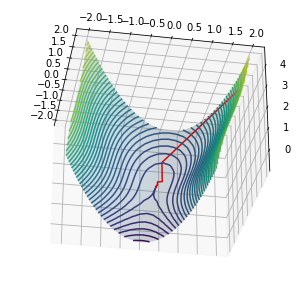

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


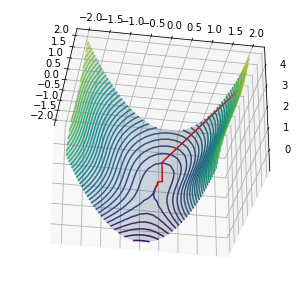

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


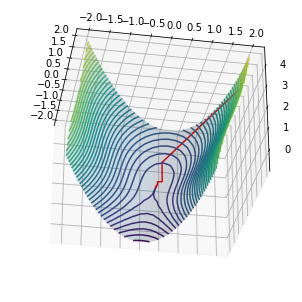

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


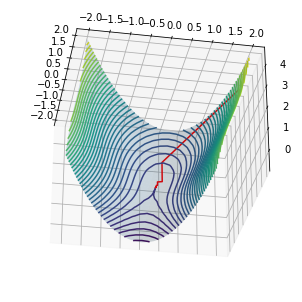

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


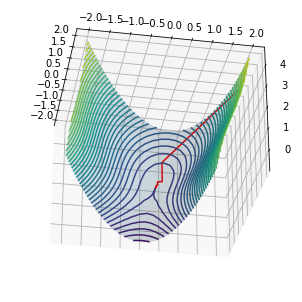

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


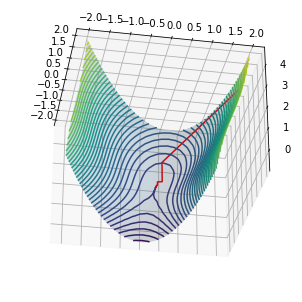

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


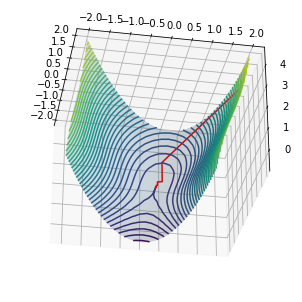

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


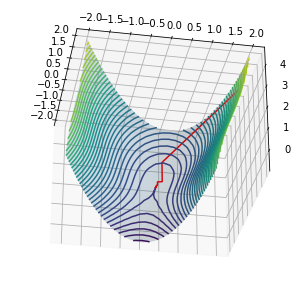

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


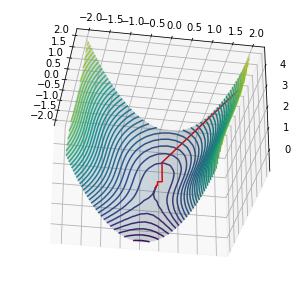

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


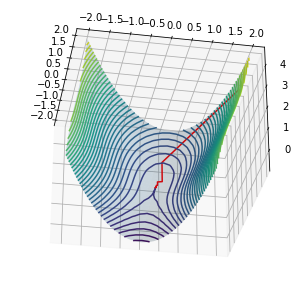

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


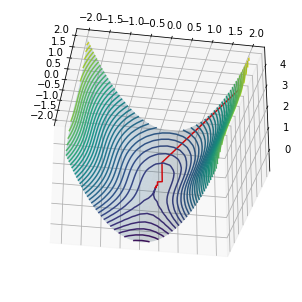

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


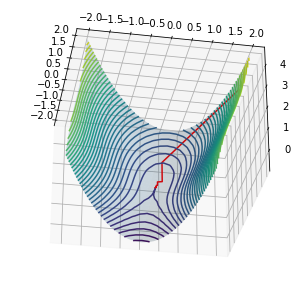

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


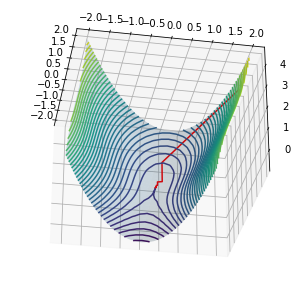

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


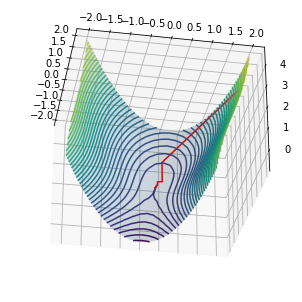

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


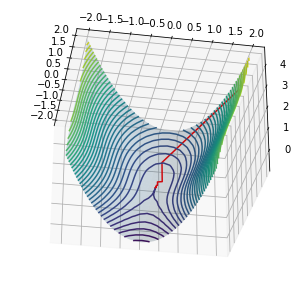

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


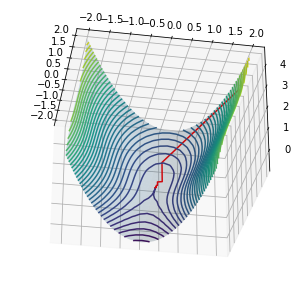

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


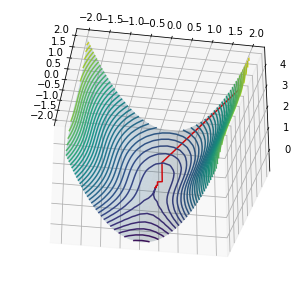

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


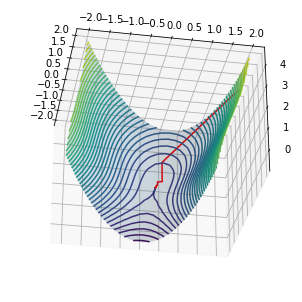

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


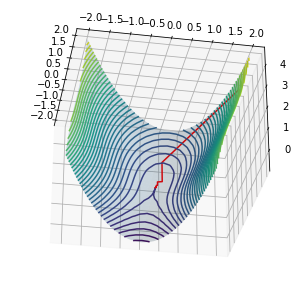

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


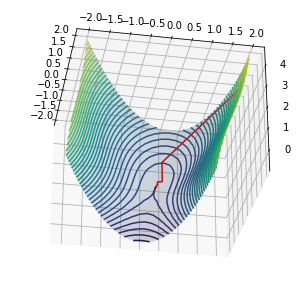

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


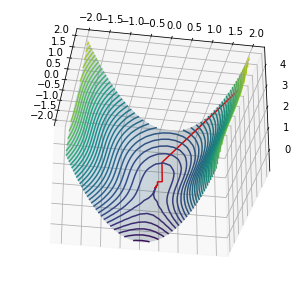

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


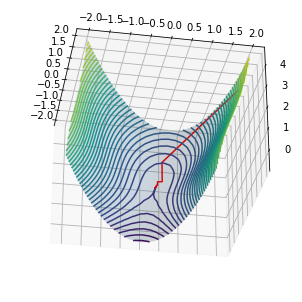

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


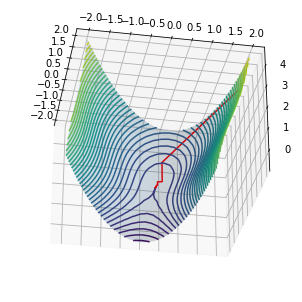

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


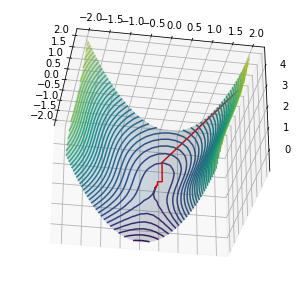

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


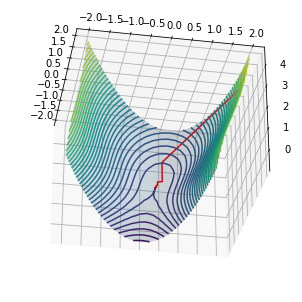

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


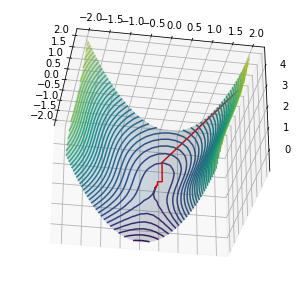

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


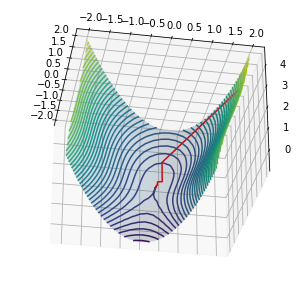

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


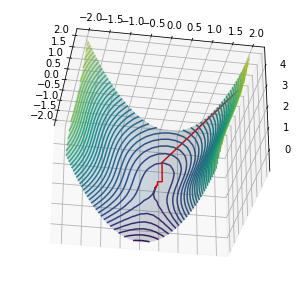

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


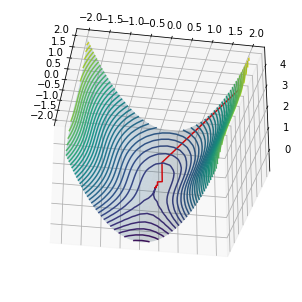

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


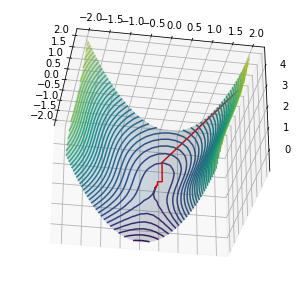

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


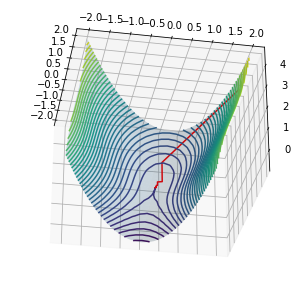

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


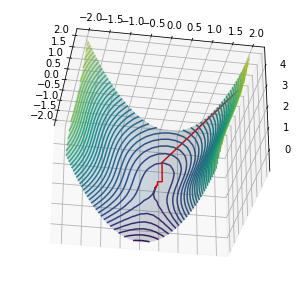

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


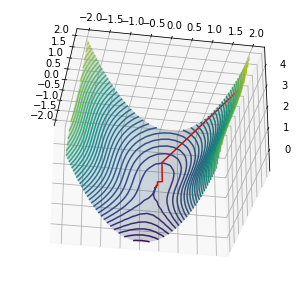

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


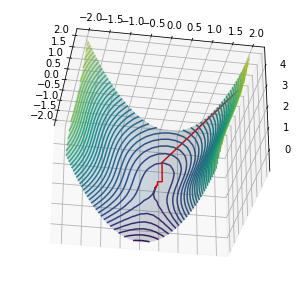

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


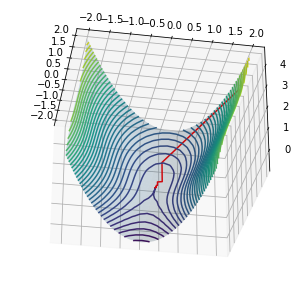

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


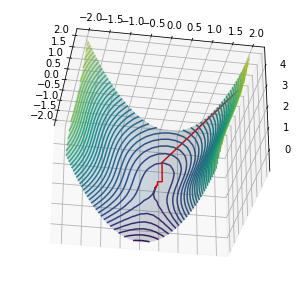

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


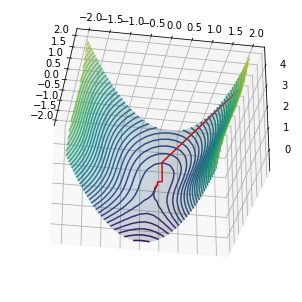

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


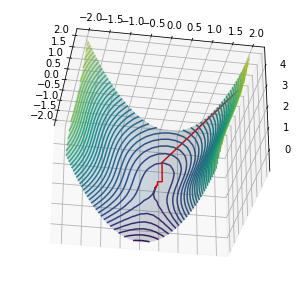

C:\Users\kkesh\AppData\Local\Temp/ipykernel_33260/3886187406.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


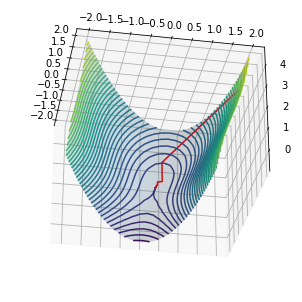

It requires 49iterations to converge
[array([1.5, 1.8]), array([ 1.1554595 , -0.03754931]), array([0.37026203, 0.1096752 ]), array([ 0.34905542, -0.00342674]), array([0.1849041 , 0.02735163]), array([ 0.17960556, -0.00090726]), array([0.11667973, 0.01089133]), array([ 0.11456838, -0.00036917]), array([0.08312081, 0.00552725]), array([ 0.08204895, -0.00018934]), array([0.06371706, 0.00324789]), array([ 0.0630871 , -0.00011194]), array([0.05127326, 0.00210316]), array([ 5.08652731e-02, -7.27671297e-05]), array([0.04269839, 0.00145852]), array([ 4.24154343e-02, -5.05988434e-05]), array([0.0364705 , 0.00106408]), array([ 3.62640486e-02, -3.69867063e-05]), array([0.03176238, 0.00080708]), array([ 3.16057817e-02, -2.80948273e-05]), array([0.02808948, 0.00063121]), array([ 2.79669978e-02, -2.19980933e-05]), array([0.02515076, 0.00050605]), array([ 2.50525654e-02, -1.76521579e-05]), array([0.02275014, 0.00041405]), array([ 2.26697910e-02, -1.44540033e-05]), array([0.02075479, 0.00034461]), arr

In [87]:
guesses = [np.array([1.5, 1.8])]

for i in range(100):

    x = guesses[-1]
    s = -df(x)
    
    def f1d(alpha):
        return f(x + alpha*s)
    
    alpha_opt = sopt.golden(f1d)
    next_guess = x + alpha_opt * s
    guesses.append(next_guess)
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.azim = -10
    ax.dist = 10
    ax.elev = -30
    xmesh, ymesh = np.mgrid[-2:2:25j,-2:2:25j]
    fmesh = f(np.array([xmesh, ymesh]))
    ax.plot_surface(xmesh, ymesh, fmesh, alpha=0.2)
    ax.contour(xmesh, ymesh, fmesh, 50)
    it_array = np.array(guesses)
    ax.plot(it_array.T[0], it_array.T[1], f(it_array.T), "r-")
    plt.show()
    eps = la.norm(guesses[i] - guesses[i-1])
    if eps < 0.0001:
        print("It requires "+str(i)+" iterations to converge")
        break

## 6. Load the MNIST dataset again, or use the previously loaded training and testing data for MNIST. Select N = 15,000 sample points from either the training or testing data or a combination of both.


### 6a. Calculate the Eigenvalue-Eigenvector pairs of the variance-covariance matrix of the sample data X

In [100]:
data = x_train[0:15000,:,:]
labels = y_train[0:15000]
data = data.reshape(len(data),-1)

In [101]:
data.shape

(15000, 784)

In [102]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)

In [112]:
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T, sample_data)
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals=(782,783))
vectors = vectors.T

In [117]:
print("The Eigenvalue-Eigenvector pairs are:\n\n", values[0],vectors[0], "\n\nand\n\n",values[1], vectors[1])

The Eigenvalue-Eigenvector pairs are:

 459916.4516745348 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.99894315e-04  6.83461251e-04 -1.39298601e-04 -1.39298601e-04
 -1.11022302e-16  1.11022302e-16  5.55111512e-17  0.00000000e+00
  0.00000000e+00 -1.38777878e-17  3.46944695e-18 -8.67361738e-19
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.49879810e-03  6.33825283e-03  7.29866133e-03
  6.89648136e-03  7.15819625e-03  6.65522353e-03  4.48761548e-03
  3.45213235e-03  2.30697542e-03  5.81640591e-04  5.51805950e-05
 -2.32839467e-04 -1.89231070e-04 -1.44661209e-03 -2.70469906e-03
 -2.98191571e-03 -2.13127752e-03 -3.63679571e-04  7.34400979e-04
  0.00000000e+00  0.00000000e+00  1.71056941e-49 -2.94004118e-49
  1.41656530e-49 -9.51963618e-50

### 6b. What is the shape of the variance-covariance matrix?


In [118]:
covar_matrix.shape

(784, 784)

### 6c. Express the MNIST data using the top two principal components and show a plot of the 1st PC against the 2nd PC.


In [119]:
import pandas as pd
new_coordinates = np.matmul(vectors, sample_data.T)
new_coordinates = np.vstack((new_coordinates, labels)).T

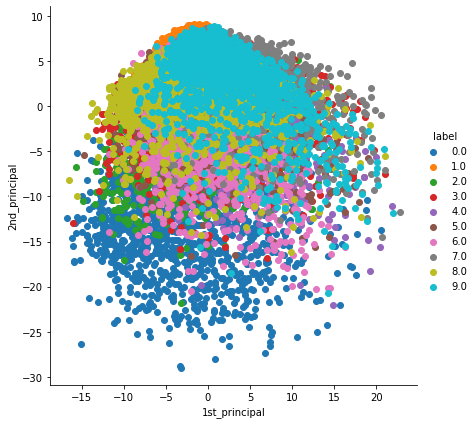

In [120]:
from sklearn import decomposition
import seaborn as sn
pca_df = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### 6d. Is this sufficient to represent the MNIST data?


No, It's not enough to represent MNIST data

## 7. Load the MNIST dataset again, or use the previously loaded training and testing data for MNIST. Select N = 15,000 sample points from either the training or testing data or a combination of both.

### 7a. Use the Logistic Hyperbolic Cosine function as the linear transformation function W to calculate the independent components of the selected MNIST data. Use a tolerance of 0.00001.

In [121]:
data = x_test[0:15000,:,:]
labels = y_test[0:15000]
data = data.reshape(len(data),-1)
standardized_data = StandardScaler().fit_transform(data)
sample_data = standardized_data
ica = decomposition.FastICA(n_components=2, fun='logcosh')
ica_data = ica.fit_transform(sample_data)

### 7b. Express the MNIST data using the top two independent components and show a plot of the 1st IC against the 2nd IC.

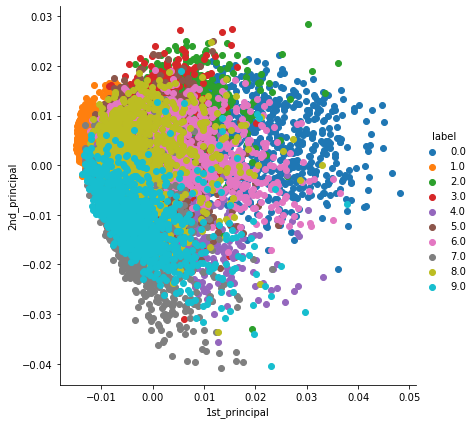

In [122]:
ica_data = np.vstack((ica_data.T, labels)).T
ica_df = pd.DataFrame(data=ica_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(ica_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### 7c. How long does it take the ICA algorithm to run, compared to PCA?


ICA has lot of lines of code that is the reason we have used fast ICA while computing. So it would take much longer than PCA.

### 7d. Is there better separation for the MNIST data when using ICA?


Yes, There will definitely be a better separation

### 7e. Is two components sufficient to represent the MNIST dataset when using ICA?


No, It's not enough to use two components when using ICA

## 8. Use the separated MNIST training and testing data with the model created in Problem 1.


### 8a. Calculate the PCA for the training and testing data and run the model from Problem 1 using the Sparse Categorical Crossentropy as the loss function

In [189]:
model.compile(optimizer="SGD", loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [190]:
# Train Data
data_train = x_train[:,:,:]
labels_train = y_train[:]
data_train = data_train.reshape(len(data_train),-1)
standardized_data_train = StandardScaler().fit_transform(data_train)
sample_data_train = standardized_data_train
pca = decomposition.PCA(n_components=2)
pca_data_train = pca.fit_transform(sample_data_train)

In [191]:
# Test Data
data_test = x_test[:,:,:]
labels_test = y_test[:]
data_test = data_test.reshape(len(data_test),-1)
standardized_data_test = StandardScaler().fit_transform(data_test)
sample_data_test = standardized_data_test
pca_test = decomposition.PCA(n_components=2)
pca_data_test = pca_test.fit_transform(sample_data_test)

### 8b. Calculate the confusion matrix of this data after 3 epochs.

In [192]:
model.fit(data_train, labels_train, epochs=3)
test_predictions = model.predict(data_test)
confusion = confusion_matrix(labels_test, np.argmax(test_predictions,axis=1))
print("Confusion Matrix:\n", confusion)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2843 - accuracy: 0.9118
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2767 - accuracy: 0.9135
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2739 - accuracy: 0.9150
Confusion Matrix:
 [[ 959    0    2    2    0    3    9    4    1    0]
 [   0 1121    2    2    0    1    5    0    4    0]
 [  11    0  975    7    4    1   11   11    9    3]
 [   3    1   26  921    0   28    1   12   12    6]
 [   1    2    3    0  917    1   23    2    8   25]
 [   9    1    1   13    0  848   12    1    5    2]
 [   6    3    3    0    3   12  928    0    3    0]
 [   3   11   23    3    1    1    0  964    3   19]
 [   7    2   13   19    7   24   12   10  871    9]
 [   8    6    2    9   31   16    1   22    5  909]]


### 8c. Repeat part a. but use the ICA dimension reduction method.


In [158]:
# Train Data
data_train = x_train[:,:,:]
labels_train = y_train[:]
data_train = data_train.reshape(len(data_train),-1)
standardized_data_train = StandardScaler().fit_transform(data_train)
sample_data_train = standardized_data_train
ica_train = decomposition.FastICA(n_components=2, fun='logcosh')
ica_data_train = ica_train.fit_transform(sample_data)

In [159]:
Notebook validation failed: Non-unique cell id '6a789d09' detected. Corrected to '9244d330'.:
"<UNKNOWN>"# Test Data
data_test = x_test[:,:,:]
labels_test = y_test[:]
data_test = data_test.reshape(len(data_test),-1)
standardized_data_test = StandardScaler().fit_transform(data_test)
sample_data_test = standardized_data_test
ica_test = decomposition.FastICA(n_components=2, fun='logcosh')
ica_data_test = ica_test.fit_transform(sample_data)

### 8d. Calculate the confusion matrix for this data after 3 epochs.


In [157]:
model.fit(data_train, labels_train, epochs=3)
test_predictions = model.predict(data_test)
confusion = confusion_matrix(labels_test, np.argmax(test_predictions,axis=1))
print("Confusion Matrix:\n", confusion)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2875 - accuracy: 0.9114
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2850 - accuracy: 0.9125
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2770 - accuracy: 0.9143
Confusion Matrix:
 [[ 957    0    2    1    1    5    7    3    4    0]
 [   0 1116    3    2    0    1    5    2    6    0]
 [   7    0  958    6    6    3   14   21   16    1]
 [   1    1   19  926    1   19    1   18   19    5]
 [   1    0    3    0  928    0   11    4    5   30]
 [   7    1    2   21    2  832   11    4    9    3]
 [  13    3    0    1    7   11  916    1    6    0]
 [   3    7   21    1    4    1    0  975    2   14]
 [   9    2    5   16    9   21   16   17  873    6]
 [   8    6    2    8   39    9    2   36   11  888]]


### 8e. Are there parameters you can tune to improve results for the data after using PCA or ICA?

Yes there are a few things which can be tuned to improve the results.

Like changing the learning rate

Making more layers

Changing the fit model etc.